In [1]:
%run ../00_AdvancedPythonConcepts/talktools.py

# Unsupervised Learning

Not all historical "answers" known in inference problems. Sometimes we look for structure without the ability to score: clustering. Sometimes we want to find lower-dimensional embeddings of large-dimensional data.

## Clustering

<img src="https://www.evernote.com/l/AUWSPWZPSkNAL6GLEX37sIbG7gYbvSUyR6UB/image.png">

### KMeans

In [2]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [3]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_

In [6]:
list(zip(labels, y))

[(1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (2, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (2, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 

From [sklearn](http://scikit-learn.org/stable/modules/clustering.html):

*"Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar that members of different classes according to some similarity metric."*

*Fowlkes-Mallows* can be used when the ground truth class assignments of the samples is known.

In [9]:
metrics.fowlkes_mallows_score(y, labels)

0.82080807291141533

If the ground truth labels are not known, evaluation must be performed using the model itself.   *Silhouette Coefficient*: a higher score relates to a model with better defined clusters.

In [7]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.55259194452136762

### DBSCAN

In [11]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [121]:
centers = [[1, 1, 0,1], [-1, -1, 2,-1.5], [1, -1, -1,1]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.5,
                            random_state=42)

X = StandardScaler().fit_transform(X)
xs = X[:,0] ; ys = X[:,1] ; zs = X[:,2]

In [122]:
X.shape

(1000, 4)

In [123]:
set(labels_true)

{0, 1, 2}

<IPython.core.display.Javascript object>


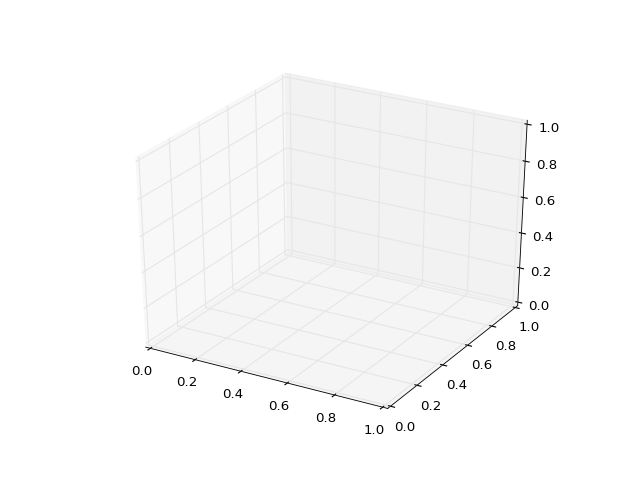

NameError: name 'xs' is not defined

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs=zs, c=labels_true)

In [134]:
db = DBSCAN(eps=0.4, min_samples=10,algorithm="kd_tree",n_jobs=-1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.615
Completeness: 0.500
V-measure: 0.552
Adjusted Rand Index: 0.413
Adjusted Mutual Information: 0.499
Silhouette Coefficient: 0.195


<IPython.core.display.Javascript object>


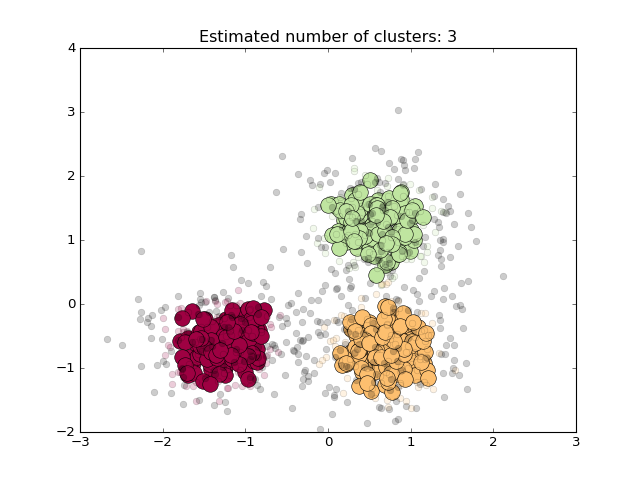

/Users/jbloom/anaconda/envs/seminar/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


In [135]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6,alpha=0.2)

plt.title('Estimated number of clusters: %d' % n_clusters_)

# Dimensionality Reduction

In our toy example above, we have a 4-D distribution over 3 clusters. Let's say we wish to find a lower-D space to transform our data. We can use Principal Component Analysis, to identify the (linear) combination of attributes that account for most of the variance in the data.

In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
print(pca.explained_variance_ratio_) 

NameError: name 'X' is not defined

In [163]:
X_r = pca.transform(X)

In [164]:
X_r

array([[ 3.1080673 ,  0.34089321],
       [ 2.52100427,  0.2822301 ],
       [-2.45295231, -0.40768099],
       ..., 
       [-0.29834214,  0.03442162],
       [ 2.2706837 ,  0.32419268],
       [-1.08905082, -0.90665314]])

<IPython.core.display.Javascript object>


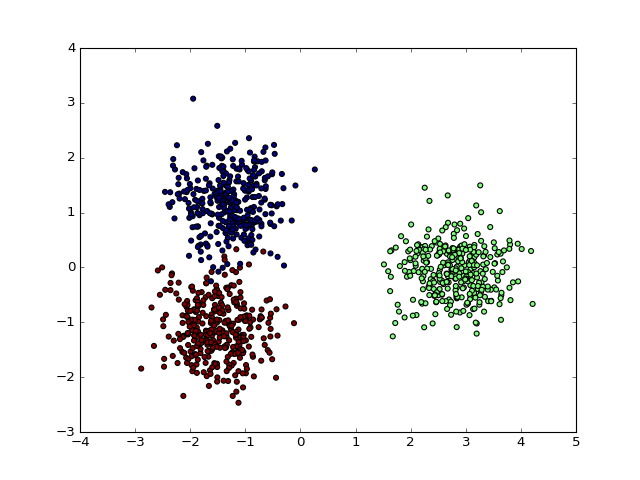

In [161]:
plt.scatter(X_r[:,0],X_r[:,1],c=labels_true)

"Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels."

In [166]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,labels_true)
print(lda.explained_variance_ratio_) 

[ 0.81704127  0.18295873]


<IPython.core.display.Javascript object>


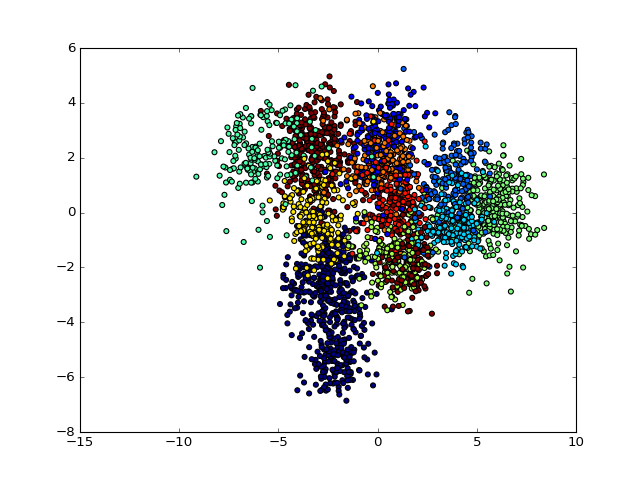

In [168]:
X_r = lda.transform(X)
plt.scatter(X_r[:,0],X_r[:,1],c=labels_true)

In [2]:
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target

In [184]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X,y)
print(lda.explained_variance_ratio_) 

[ 0.28912041  0.18262788  0.16962345]


/Users/jbloom/anaconda/envs/seminar/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<IPython.core.display.Javascript object>


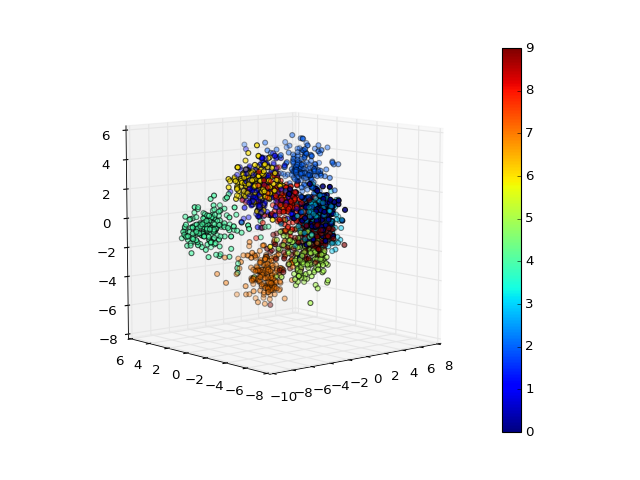

In [187]:
X_r = lda.transform(X)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cax=ax.scatter(X_r[:,0],X_r[:,1],X_r[:,2],c=y)
cbar = fig.colorbar(cax)

## Manifold Learning

non-linear dimensionality reduction

In [1]:
%matplotlib inline 
from sklearn import manifold
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

n_points = 3000
X, t = datasets.samples_generator.make_swiss_roll(n_samples=n_points)
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=t)

ax1 = fig.add_subplot(212)
ax1.scatter(X[:,0], X[:,2], c=t)

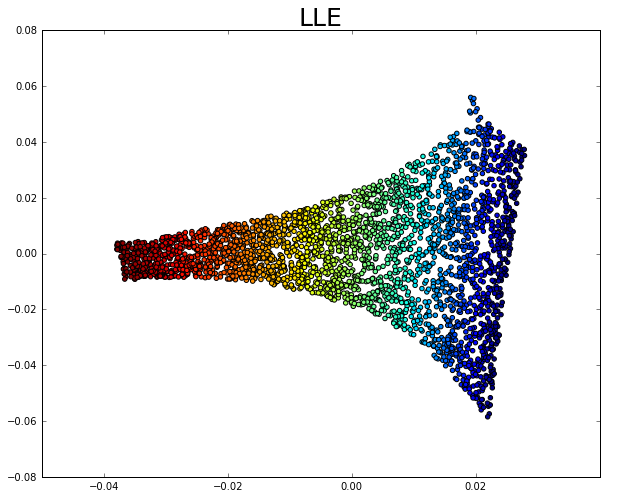

In [37]:
## Locally Linear Embedding .... like PCA on the local scale (preserving neighborhood distances).

from sklearn import manifold
out_dim = 2
n_neighbors = 10

Y = manifold.LocallyLinearEmbedding(n_neighbors, out_dim, eigen_solver='auto',\
                                    method='standard').fit_transform(X)
plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1], c=t)
plt.title("LLE",size=25)

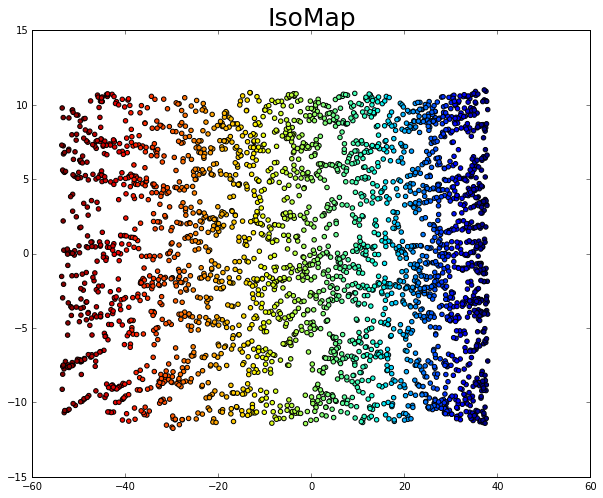

In [38]:
# IsoMap is a non-linear kernel PCA
Y = manifold.Isomap(n_neighbors, out_dim).fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1], c=t)
plt.title("IsoMap",size=25)

t-SNE

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [ ]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=0)
X_tsne = tsne.fit_transform(X)

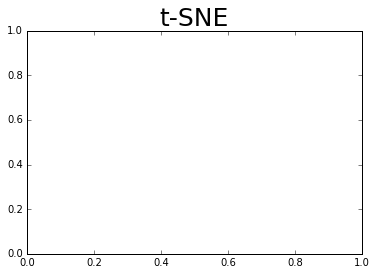

In [73]:
%matplotlib inline
ax.scatter(X_tsne[:,0],X_tsne[:,1])

plt.title("t-SNE",size=25)

In [67]:
x_min, x_max = np.min(X_tsne, 0), np.max(X_tsne, 0)
X_tsne = (X_tsne - x_min) / (x_max - x_min)

In [72]:
X_tsne.min()

0.0

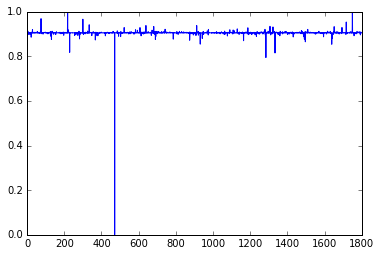

In [74]:
plt.plot(X_tsne[:,0])